# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** 
* No, the Smartcab doesn't move at all during the simulation.
* The driving agent is receiving rewards by taking no action.
* If the agent idles when the light is red, it gets positive rewards. If it idles when the light is green, it gets negative rewards.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
* Agent.py: "num_dummies" flag can be set to a number other than the default 100 to change the number of dummy agents in the environment, which will change the difficulty of the game. "learning" flage can be set to True to force the driving agent to use Q-learning. "enforce_deadline" can be set to be True so that the deadline of the Smartcab is enforced.   
* Environment.py: the function "act()" will be called when an agent performs an action. The function will return a reward.
* Simulator.py: "render()" function is used for GUI render display of the simulation, while "render_text()" is for the non-GUI terminal.
* Planner.py: the "next_waypoint()" function will consider the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


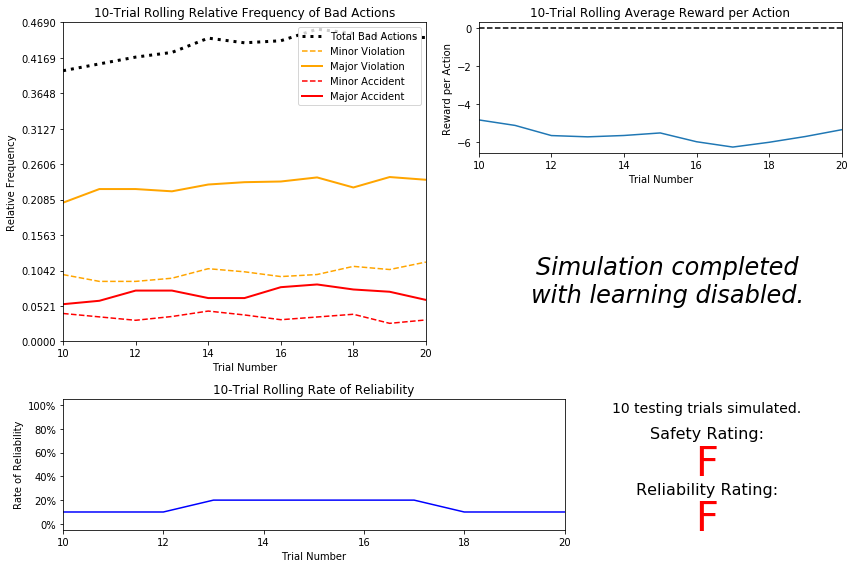

In [6]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** 
* The driving agent is making bad decisions in over 40% of the time, represented by the black dotted line. The accidents are represented by the red lines. Adding the two red lines gives a frequency of about 10%, which corresponds to about 25% of the bad decisions.
* Yes, it makes sense. If the agent drives randomly, the chance that it reaches the goal is very small. So one cannot count on its reliability.
* The reward is given by not running into accidents and choosing the right direction. All 10 trials give rewards well below zero, which suggests the agent has been penalized heavily.
* The outcome of results doesn't change significantly as the number of trials increases, as the agent is only exploring and not learning from the trials.
* This Smartcab is neither safe nor reliable for its passengers as both ratings are F, the lowest grade.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** The available features to the agent are "waypoint", "inputs" and "deadline". 

"Waypoint" points the right direction for agents. It is a good indicator for efficiency.

The sub-features of the "inputs" are relevant. All four sub-features are important for safety. With these information, the smartcab can avoid violations. Specifically, 1) "light" is necessary because the light dictates whether the forward and left-turn traffics are allowed; 2) the "left" is necessary, because when the light is red and the agent wants to turn right, it needs to wait for the left cab; 3) the oncoming is necessary, because when the light is green and the agent wants to turn left, it needs to wait for the oncoming cab; the right is actually not necessary as no matter the light status, the right cab doesn't have the right of way or doesn't bother the Smartcab.

"Deadline" is not quite relevant for the safety or efficiency. The smartcab should find the best route during trials; the deadline doesn't help here. In addition, the "deadline" is a continuous integer with the initial value set to 5 times the Manhattan distance, which will give us too many states to play with.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** I have selected 2 features: "waypoint" and "inputs". 

The "waypoint" will return 3 directions if the primary agent hasn't reached the destination: "forward", "left", "right". 

The "inputs" includes 3 used sub-features: "light", "left", and "oncoming". The "light" has two values ("green" and "red"). The other three sub-features represent the other agents in the three direction. Since each agent is independent, they also have three choices: going forward, left and right; there could be no agents. 

So the size of the state space is 3x2x4x4 = 96. This is a finite number and not very big. I believe a policy can be learned for each possible state within a reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

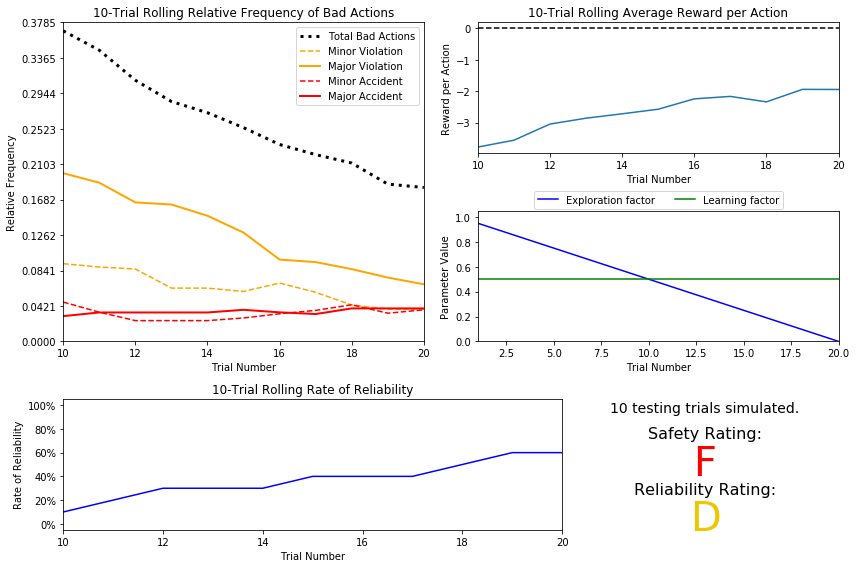

In [115]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** (From Quetion 3)
#### How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?
The driving agent is making bad decisions in about 20% of the time after the trials, as indicated by the black dotted line. The accidents are represented by the red lines. Adding the two red lines gives a frequency of about 9%, which corresponds to almost half of the bad decisions.
#### Given that the agent is driving randomly, does the rate of reliability make sense?
The driving agent is not driving randomly this time but learning to generate Q-values. The rate of reliability improves quite a bit to about 60%. This makes sense as the driving agent has learned to achieve a better score.
#### What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?
The reward is given by not running into accidents and choosing the right direction. All 10 trials still give rewards below zero, which suggests the agent has been penalized heavily. However, it improves with the trial number.
#### As the number of trials increases, does the outcome of results change significantly?
Yes, the outcome changes significantly as the number of trials increases.
#### Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?
This Smartcab is neither safe nor reliable for its passengers as the two ratings are F and D, very low grades.

(From Question 6)
#### Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?
Yes, both don't do well in accident rates. The rate doesn't improve after trials.
#### Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?
20 training trials were made before the testing. It makes sense as the epsilon starts at 1 and decreases by 0.05 for each trial. With the tolerance as 0.05, the agent will get 20 times of training.
#### Is the decaying function you implemented for  ϵϵ  (the exploration factor) accurately represented in the parameters panel?
Yes, in the file "sim_default-learning.csv", the epsilon decreases by 0.05 for each trial. The precision of the float number is not perfect though. This doesn't affect the training.
#### As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?
Yes, the total number of bad actions decreases. The average reward increases. 
#### How does the safety and reliability rating compare to the initial driving agent?
The safety rating is the same, the worst. The reliability is better, from F to D.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

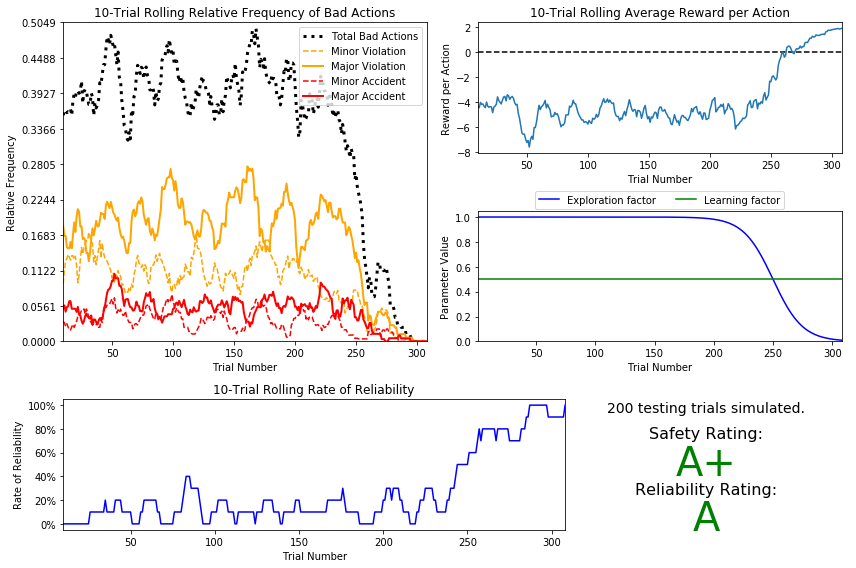

In [13]:
# t0 = 1000, epsilon=1, alpha=0.1, a = 0.01, tolerance=0.001, n_test=200 (These are the parameters used when the right cab was taken into the state.)

# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
# Note that the comments after this graph are based on the previous discussion when the right cab was taken into account for the Smartcab state.

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** I will answer these questions based on the above graph (the second one).
* I use the modified sigmoid decaying function for the exploration factor:$$ \epsilon = 1 - \frac{1}{1+e^{-a(t-t_0)}},  \textrm{for } 0 < a < 1 $$
* About 1700 training trials were needed before beginning testing.
* I use the epsilon-tolerance of 0.001 and the learning rate of 0.1. The tolerance is used mostly to control the number of trials using the modified sigmoid function. I set it low (one thousandth) to see how the model performs in terms of the bad actions. When the tolerance is too low, the agent is essentially not exploring. A low alpha is useful when the same (state, action) pair can be associated with significantly different rewards over the trials. (A high alpha would keep jumping between the two values, while a lower one will converge at a weighted average.) When the rewards don't change much, a high alpha works best, as it speeds up the learning process. (This is especially pronounced when the difference between the maximum and the 2nd highest Q-value is minuscule, but that doesn't apply here.)
* The improvement is dramatic. With 200 tests, the safety rating can reach A+ and the reliability rating can reach A. This is a very good result considering the number of tests given.
* Yes, to some extent. The model is not optimal though. The next_way_point always directs the smartcab east-west first before it considers north-south, which will apparently affect the reliability.
* Yes, I would say the ratings that I get for the Smartcab are pretty good.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
1. The optimal policy will let the Smartcab reach the destination without breaking any traffic rule. Each movement should heading towards the destination in two possible directions. For example, if the destination is to the northeast of the starting point, the two directions should be north and east. The following analysis is based on this example:
    - If the heading is to the east and the light is green, the optimal policy is to wait for the crossing agents passing the intersection and then proceed forward; if the light is red, the Smartcab should idle at its current position. 
    - If the heading is to the north and the light is green, the optimal policy is to wait for the crossing agents passing the intersection and then proceed forward; if the light is red, the Smartcab can wait for the traffic to the right to clear and then turn right (to the east).
    - If the heading is to the west, the optimal policy is to wait for the traffic to the right to clear and then turn right (to the north), no matter the light is green or red.
    - If the heading is to the south and the light is green, the optimal policy is to wait for the traffic to the left to clear and then turn left (to the east). If the light is red, the Smartcab should idle at its current position.
One thing to note though. For this program, the state is construsted with the next_way_point and the states of other agents around the intersection. However, the next_way_point will not consider the north-south direction until the there is no movement necessary for the east-west direction. So the optimal policy for this particular game is to match the next_way_point while obeying the traffic rules.

2. The policy for a given state mostly matches the optimal policy. Some are different, because the optimal policy hasn't been explored (the reward is 0). Or values of the next states shall be used to determine the optimal policy.
    
3. See three examples below: (NOTE: These arguments are based on the submission prior to the most recent update.)
   * Example 1: ('right', 'green', 'left', 'right', None)
 -- forward : 0.59
 -- right : 1.55
 -- None : -3.36
 -- left : 0.42
 
  The next_way_point is "right", and the light is green, so the optimal policy is to turn right. "Right" has the largest value.
 
    * Example 2: ('forward', 'red', 'right', 'left', None)
 -- forward : -5.14
 -- right : 0.42
 -- None : 1.18
 -- left : -13.64
 
  The next_way_point is "forward" and the light is red, so the optimal policy is to idle at its current position. "None" has the largest value. 
 
    * Example 3: ('forward', 'green', 'left', 'left', 'forward')
 -- forward : 1.37
 -- right : 0.25
 -- None : -1.34
 -- left : 0.00
 
  The next_way_point is "forward" and the light is green. The oncoming cab is turning left and the right cab is going forward. However, both the oncoming cab and the right cab should yield to the Smartcab according to the traffic law. So the Smartcab should go forward. "Forward" gets the largest value.

4. See two examples below:
    * ('left', 'green', 'forward', 'forward', 'forward')
 -- forward : 0.66
 -- right : 0.06
 -- None : -0.97
 -- left : -5.53
 
  When the Smartcab wants to turn left, there is an oncoming cab going forward. The "forward" has the largest value. This is not the optimal policy. The optimal policy can be to wait for the oncoming traffic to clear and then proceed to turn left. Or, if the destination is to the back of the Smartcab, it can also choose to turn right and then turn right or make a U turn. In this situation, the optimal policy depends on the values of the next states. Also, the next_way_point function should be adjusted so that north-south direction can be considered equally as the east-west direction.
  
    Reviewer's comment:
    I'd argue that going forward is the optimal action in this case.
    Let's consider our options:

    None: idling at green lights is penalized
    'left': would cause an accident due to the oncoming car
    'right': will most likely take us further away from the destination (unless the planner wants us to turn around)
    'forward': might take us closer to the destination if we're lucky
  
    * ('right', 'green', 'right', 'right', 'right')
 -- forward : 0.00
 -- right : 0.00
 -- None : -0.41
 -- left : 0.00
 
  In this situation, the Smartcab will choose one of the "forward", "right" and "left" randomly. Apparently, the result may not be optimal. The mismatch is caused by the partial exploration of the policies.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** 
* Smartcab: the learning agent is limited to its current view at the moment. Not only it doesn't have the full view of the entire grid, but also the road situations keep changing. The future reward is typically used in a more static situation. For such a dynamic task, the Smartcab cannot count on the future rewards based on the current moment.

Reviewer's comments:
Remember how the agent sees the world; what does this mean for the states?
Are they linked to specific intersections (locations)?
Does it make sense to talk about the distance between the destination and any specific states?
Thus, can we propagate rewards towards states which are "close to the destination"?

* Environment: the start position and the destination are set random for each trial. This means that the Smartcab cannot learn based on the memory of the previous trial. Since the Smartcab cannot take advantage of the previous route information, it needs to count on the immediately reward, not future rewards. Besides, reaching at the destination doesn't yield a much higher reward. After all, safety first, reliability second. The Smartcab shouldn't try to get the anticipated maximum reward by violating the traffic rules. It should concentrate on each step.

Reviewer's comment:

Being able to learn a path to the destination by heart would not make the agent less safe.
You can always adjust the gamma value or the rewards if things go haywire.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.